In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib

In [2]:
dataset_path = "D:\Deep Learning project\dataset"
dataset_dir = pathlib.Path(dataset_path)

In [3]:
class_names = [item.name for item in dataset_dir.iterdir() if item.is_dir()]

print(class_names)

['algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [4]:
# Parameter setting
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [5]:
# Loading data for Training
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 785 files belonging to 7 classes.
Using 628 files for training.


In [6]:
# Loading data for Validation
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,                                                            
                                                     validation_split=val_split,                                                            
                                                     subset="validation",                                                     
                                                     seed=123,                                                     
                                                     image_size=(img_height, img_width),                                                     
                                                     batch_size=val_batch                                                           
                                                    )

Found 785 files belonging to 7 classes.
Using 157 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


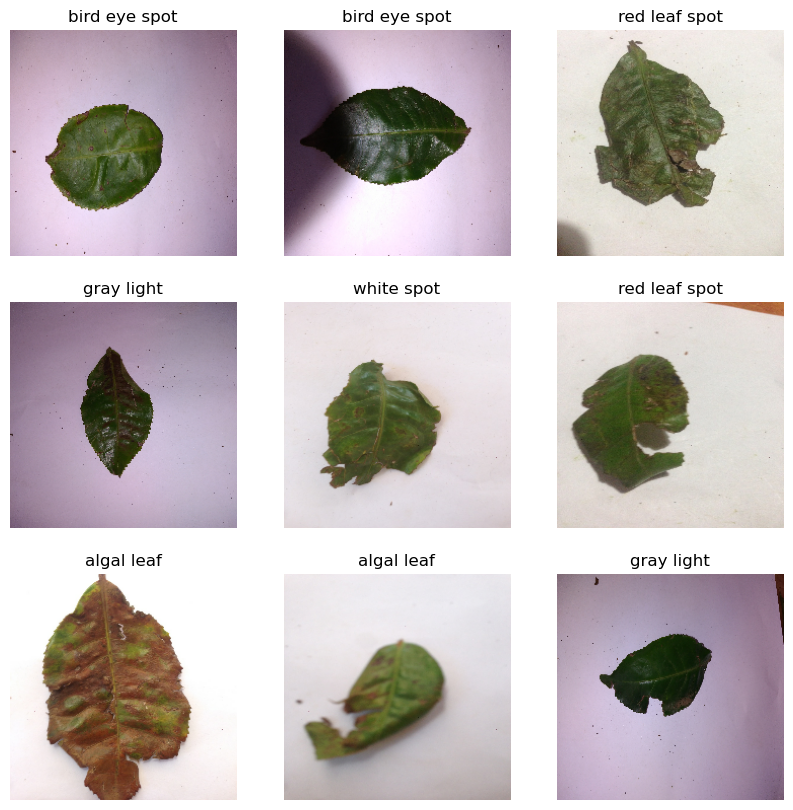

In [8]:
# Review 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# Data augmentation 
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [11]:
# Model architecture
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [12]:
# compiling model
base_learning_rate = 0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                 

In [14]:
epochs=300
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1
)

Epoch 1/300


5/5 [==============================] - 11s 1s/step - loss: 2.3488 - accuracy: 0.1672 - val_loss: 2.0457 - val_accuracy: 0.1465
Epoch 2/300
5/5 [==============================] - 4s 916ms/step - loss: 2.1365 - accuracy: 0.2213 - val_loss: 2.0584 - val_accuracy: 0.1465
Epoch 3/300
5/5 [==============================] - 5s 951ms/step - loss: 1.9958 - accuracy: 0.2516 - val_loss: 1.9820 - val_accuracy: 0.1465
Epoch 4/300
5/5 [==============================] - 5s 937ms/step - loss: 1.8249 - accuracy: 0.3105 - val_loss: 1.8951 - val_accuracy: 0.2102
Epoch 5/300
5/5 [==============================] - 4s 892ms/step - loss: 1.7314 - accuracy: 0.3248 - val_loss: 1.8316 - val_accuracy: 0.2484
Epoch 6/300
5/5 [==============================] - 4s 882ms/step - loss: 1.6355 - accuracy: 0.3487 - val_loss: 1.7779 - val_accuracy: 0.3503
Epoch 7/300
5/5 [==============================] - 5s 930ms/step - loss: 1.5565 - accuracy: 0.3822 - val_loss: 1.7074 - val_accuracy: 0.3439
Epoch 8/300
5

5/5 [==============================] - 5s 915ms/step - loss: 0.5934 - accuracy: 0.7771 - val_loss: 0.8442 - val_accuracy: 0.8280
Epoch 56/300
5/5 [==============================] - 5s 972ms/step - loss: 0.5695 - accuracy: 0.7787 - val_loss: 0.9195 - val_accuracy: 0.7834
Epoch 57/300
5/5 [==============================] - 5s 916ms/step - loss: 0.5363 - accuracy: 0.8201 - val_loss: 0.8384 - val_accuracy: 0.8089
Epoch 58/300
5/5 [==============================] - 4s 908ms/step - loss: 0.5245 - accuracy: 0.7978 - val_loss: 0.8089 - val_accuracy: 0.8153
Epoch 59/300
5/5 [==============================] - 5s 948ms/step - loss: 0.5235 - accuracy: 0.8137 - val_loss: 0.8026 - val_accuracy: 0.8280
Epoch 60/300
5/5 [==============================] - 5s 925ms/step - loss: 0.5243 - accuracy: 0.8312 - val_loss: 0.8060 - val_accuracy: 0.7134
Epoch 61/300
5/5 [==============================] - 4s 919ms/step - loss: 0.5161 - accuracy: 0.8248 - val_loss: 0.7944 - val_accuracy: 0.7898
Epoch 62/300
5/5 [=

Epoch 113/300
5/5 [==============================] - 5s 939ms/step - loss: 0.3801 - accuracy: 0.8694 - val_loss: 0.4461 - val_accuracy: 0.8217
Epoch 114/300
5/5 [==============================] - 4s 915ms/step - loss: 0.3752 - accuracy: 0.8678 - val_loss: 0.6287 - val_accuracy: 0.7325
Epoch 115/300
5/5 [==============================] - 4s 904ms/step - loss: 0.3958 - accuracy: 0.8439 - val_loss: 0.3777 - val_accuracy: 0.8535
Epoch 116/300
5/5 [==============================] - 5s 968ms/step - loss: 0.3520 - accuracy: 0.8854 - val_loss: 0.3601 - val_accuracy: 0.8535
Epoch 117/300
5/5 [==============================] - 5s 930ms/step - loss: 0.3374 - accuracy: 0.8726 - val_loss: 0.4454 - val_accuracy: 0.8280
Epoch 118/300
5/5 [==============================] - 5s 935ms/step - loss: 0.3430 - accuracy: 0.8774 - val_loss: 0.3418 - val_accuracy: 0.8662
Epoch 119/300
5/5 [==============================] - 5s 959ms/step - loss: 0.3573 - accuracy: 0.8678 - val_loss: 0.3400 - val_accuracy: 0.8662

5/5 [==============================] - 5s 1s/step - loss: 0.2797 - accuracy: 0.9156 - val_loss: 0.2781 - val_accuracy: 0.8981
Epoch 171/300
5/5 [==============================] - 5s 993ms/step - loss: 0.2628 - accuracy: 0.9108 - val_loss: 0.2842 - val_accuracy: 0.8981
Epoch 172/300
5/5 [==============================] - 5s 989ms/step - loss: 0.2574 - accuracy: 0.9061 - val_loss: 0.3206 - val_accuracy: 0.8981
Epoch 173/300
5/5 [==============================] - 5s 1s/step - loss: 0.2735 - accuracy: 0.9045 - val_loss: 0.3066 - val_accuracy: 0.9045
Epoch 174/300
5/5 [==============================] - 5s 995ms/step - loss: 0.2457 - accuracy: 0.9299 - val_loss: 0.2739 - val_accuracy: 0.9108
Epoch 175/300
5/5 [==============================] - 5s 937ms/step - loss: 0.2387 - accuracy: 0.9204 - val_loss: 0.3690 - val_accuracy: 0.8854
Epoch 176/300
5/5 [==============================] - 5s 987ms/step - loss: 0.2579 - accuracy: 0.9092 - val_loss: 0.2763 - val_accuracy: 0.8981
Epoch 177/300
5/5 [

Epoch 228/300
5/5 [==============================] - 5s 976ms/step - loss: 0.2447 - accuracy: 0.9061 - val_loss: 0.2901 - val_accuracy: 0.9045
Epoch 229/300
5/5 [==============================] - 5s 976ms/step - loss: 0.2180 - accuracy: 0.9283 - val_loss: 0.2834 - val_accuracy: 0.8981
Epoch 230/300
5/5 [==============================] - 5s 929ms/step - loss: 0.2378 - accuracy: 0.9124 - val_loss: 0.2680 - val_accuracy: 0.9108
Epoch 231/300
5/5 [==============================] - 5s 956ms/step - loss: 0.2044 - accuracy: 0.9363 - val_loss: 0.2945 - val_accuracy: 0.9108
Epoch 232/300
5/5 [==============================] - 5s 979ms/step - loss: 0.2108 - accuracy: 0.9347 - val_loss: 0.3556 - val_accuracy: 0.8662
Epoch 233/300
5/5 [==============================] - 5s 1s/step - loss: 0.2503 - accuracy: 0.9156 - val_loss: 0.2739 - val_accuracy: 0.9045
Epoch 234/300
5/5 [==============================] - 5s 980ms/step - loss: 0.2139 - accuracy: 0.9108 - val_loss: 0.2888 - val_accuracy: 0.9172
Ep

5/5 [==============================] - 4s 927ms/step - loss: 0.1792 - accuracy: 0.9331 - val_loss: 0.2576 - val_accuracy: 0.9427
Epoch 286/300
5/5 [==============================] - 4s 926ms/step - loss: 0.1998 - accuracy: 0.9268 - val_loss: 0.3714 - val_accuracy: 0.9108
Epoch 287/300
5/5 [==============================] - 5s 970ms/step - loss: 0.1729 - accuracy: 0.9506 - val_loss: 0.2907 - val_accuracy: 0.9236
Epoch 288/300
5/5 [==============================] - 5s 905ms/step - loss: 0.1862 - accuracy: 0.9379 - val_loss: 0.3544 - val_accuracy: 0.8917
Epoch 289/300
5/5 [==============================] - 5s 939ms/step - loss: 0.1712 - accuracy: 0.9475 - val_loss: 0.2813 - val_accuracy: 0.8981
Epoch 290/300
5/5 [==============================] - 5s 936ms/step - loss: 0.1883 - accuracy: 0.9283 - val_loss: 0.2456 - val_accuracy: 0.9427
Epoch 291/300
5/5 [==============================] - 5s 932ms/step - loss: 0.1618 - accuracy: 0.9443 - val_loss: 0.2859 - val_accuracy: 0.9236
Epoch 292/300

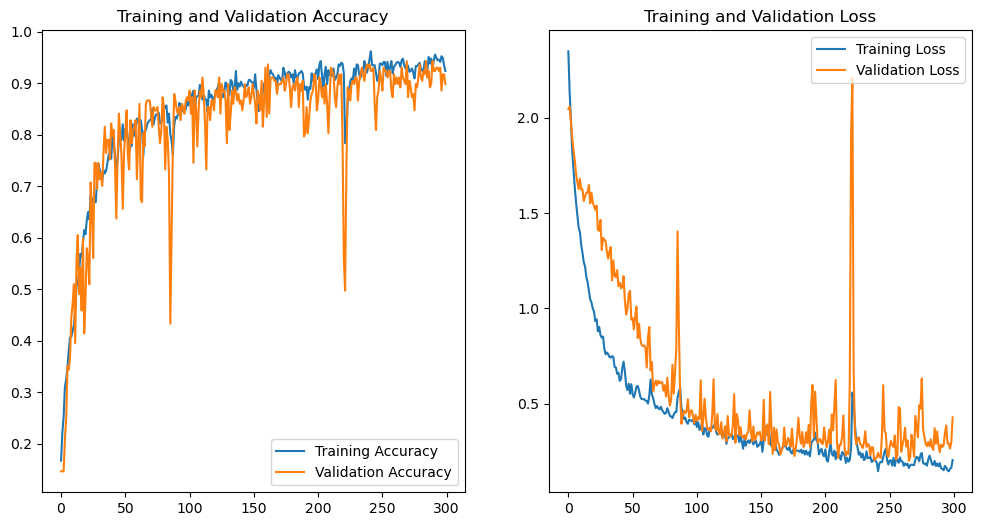

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 0s 46ms/step


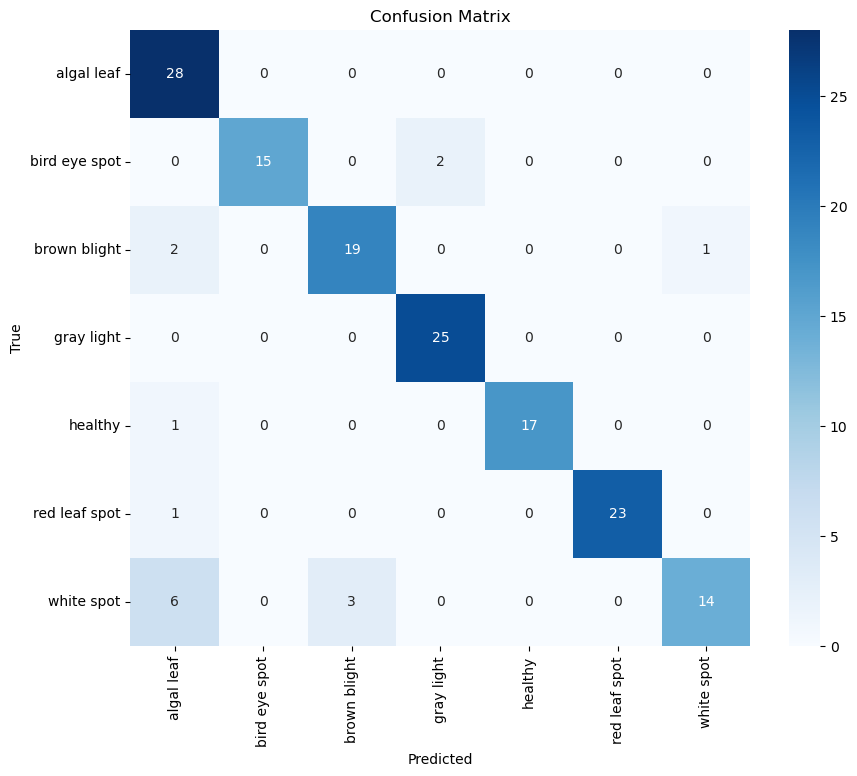

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


val_predictions = model.predict(val_ds)
val_predictions = np.argmax(val_predictions, axis=1)


true_labels = []
for _, labels in val_ds:
    true_labels.extend(labels.numpy())


conf_mat = confusion_matrix(true_labels, val_predictions)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Predictions:
 [4 0 3 6 6 5 0 1 5 6 1 2 5 5 3 1 1 0 3 5 3 6 0 0 0 3 0 6 1 5 3 4 2 4 2 6 0
 1 2 1 5 2 0 0 5 6 6 4 3 6 2 0 4 0 5 4 0 0 3 2 2 0 2 0 0 2 2 1 3 3 5 4 4 4
 3 0 0 2 2 5 6 4 5 3 2 0 2 2 2 3 3 0 1 3 6 6 5 1 0 1 5 0 5 4 3 0 5 4 5 5 4
 3 3 0 4 6 3 4 1 5 0 1 5 1 6 2 5 0]
Labels:
 [4 0 3 6 6 5 0 1 5 6 1 2 5 5 3 1 1 6 3 5 3 6 0 0 0 3 0 2 1 5 3 4 2 4 2 6 0
 1 2 1 5 2 2 0 5 6 6 4 3 6 2 0 4 6 5 4 0 0 3 2 2 0 2 6 6 2 2 1 3 3 5 4 4 4
 3 0 0 2 2 5 6 4 5 3 2 0 6 6 2 3 3 0 1 3 6 6 5 1 0 1 5 0 5 4 3 0 5 4 5 5 4
 3 3 0 4 6 3 4 1 5 0 1 5 1 6 2 5 5]

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      1.00      1.00        14
           2       0.89      0.89      0.89        18
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        15
           5       1.00      0.95      0.98        22
           6       0.93      0.68      0.79        19

    accuracy        

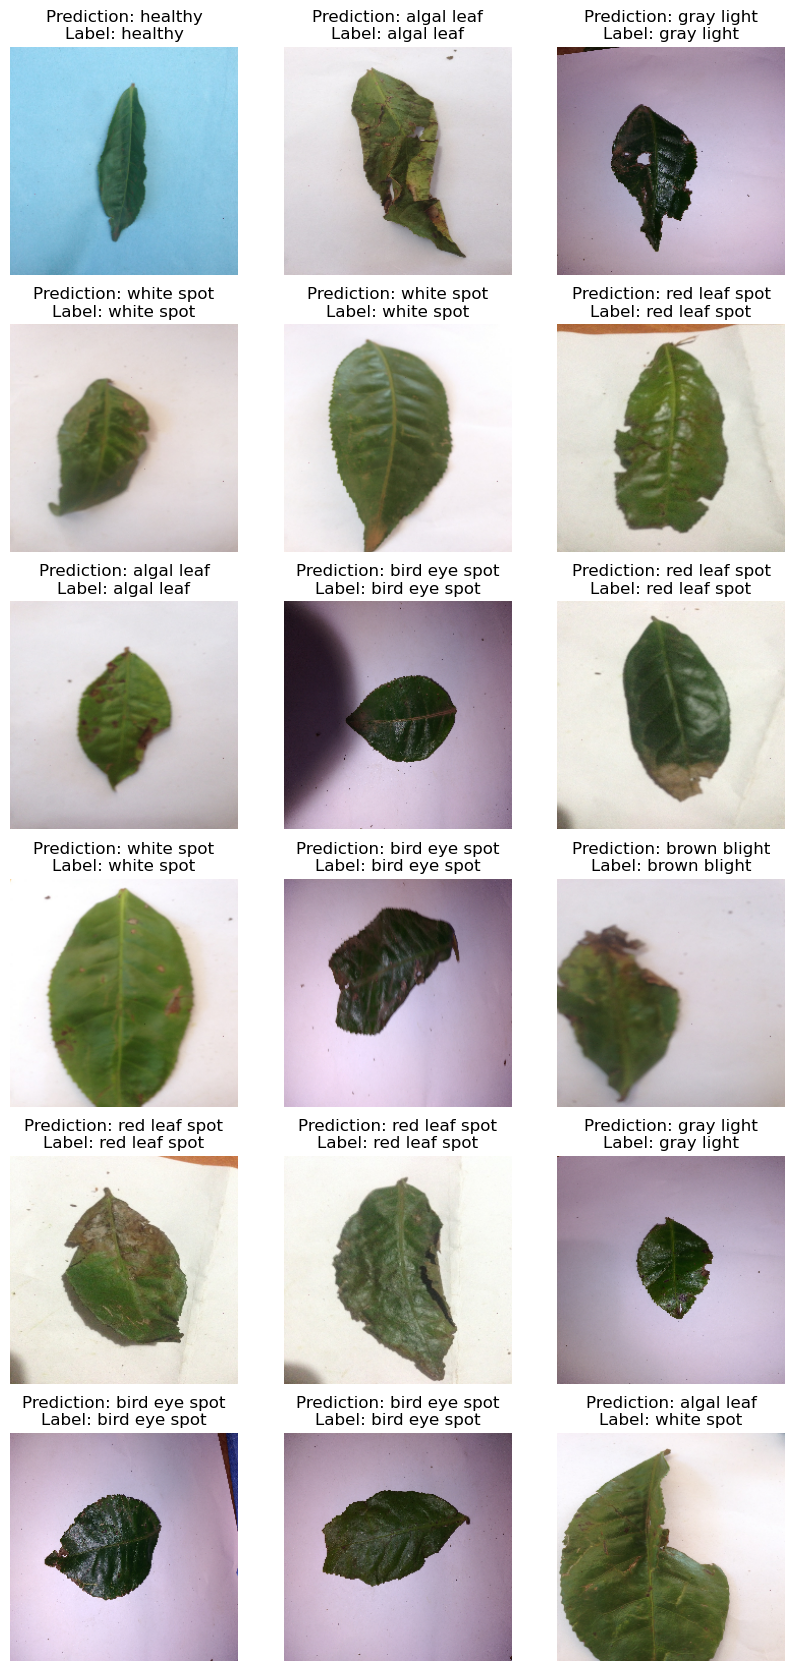

In [17]:

image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

class_predictions = []
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)

class_predictions = np.array(class_predictions)
print('Predictions:\n', class_predictions)
print('Labels:\n', label_batch)
print()
print(classification_report(label_batch, class_predictions))

plt.figure(figsize=(10, 21))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction: "+class_names[class_predictions[i]]+"\nLabel: "+class_names[label_batch[i]])
    plt.axis("off")

In [18]:
model.save("D:\Deep Learning project/modelV2Best")

INFO:tensorflow:Assets written to: D:\Deep Learning project/modelV2Best\assets


INFO:tensorflow:Assets written to: D:\Deep Learning project/modelV2Best\assets
